In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import metrics,neighbors
from scipy.interpolate import BSpline
from scipy import interpolate
import numpy as np
import pylab
from sklearn.model_selection  import train_test_split,KFold

In [2]:
pylab.rcParams['figure.figsize'] = (30.0, 20.0)

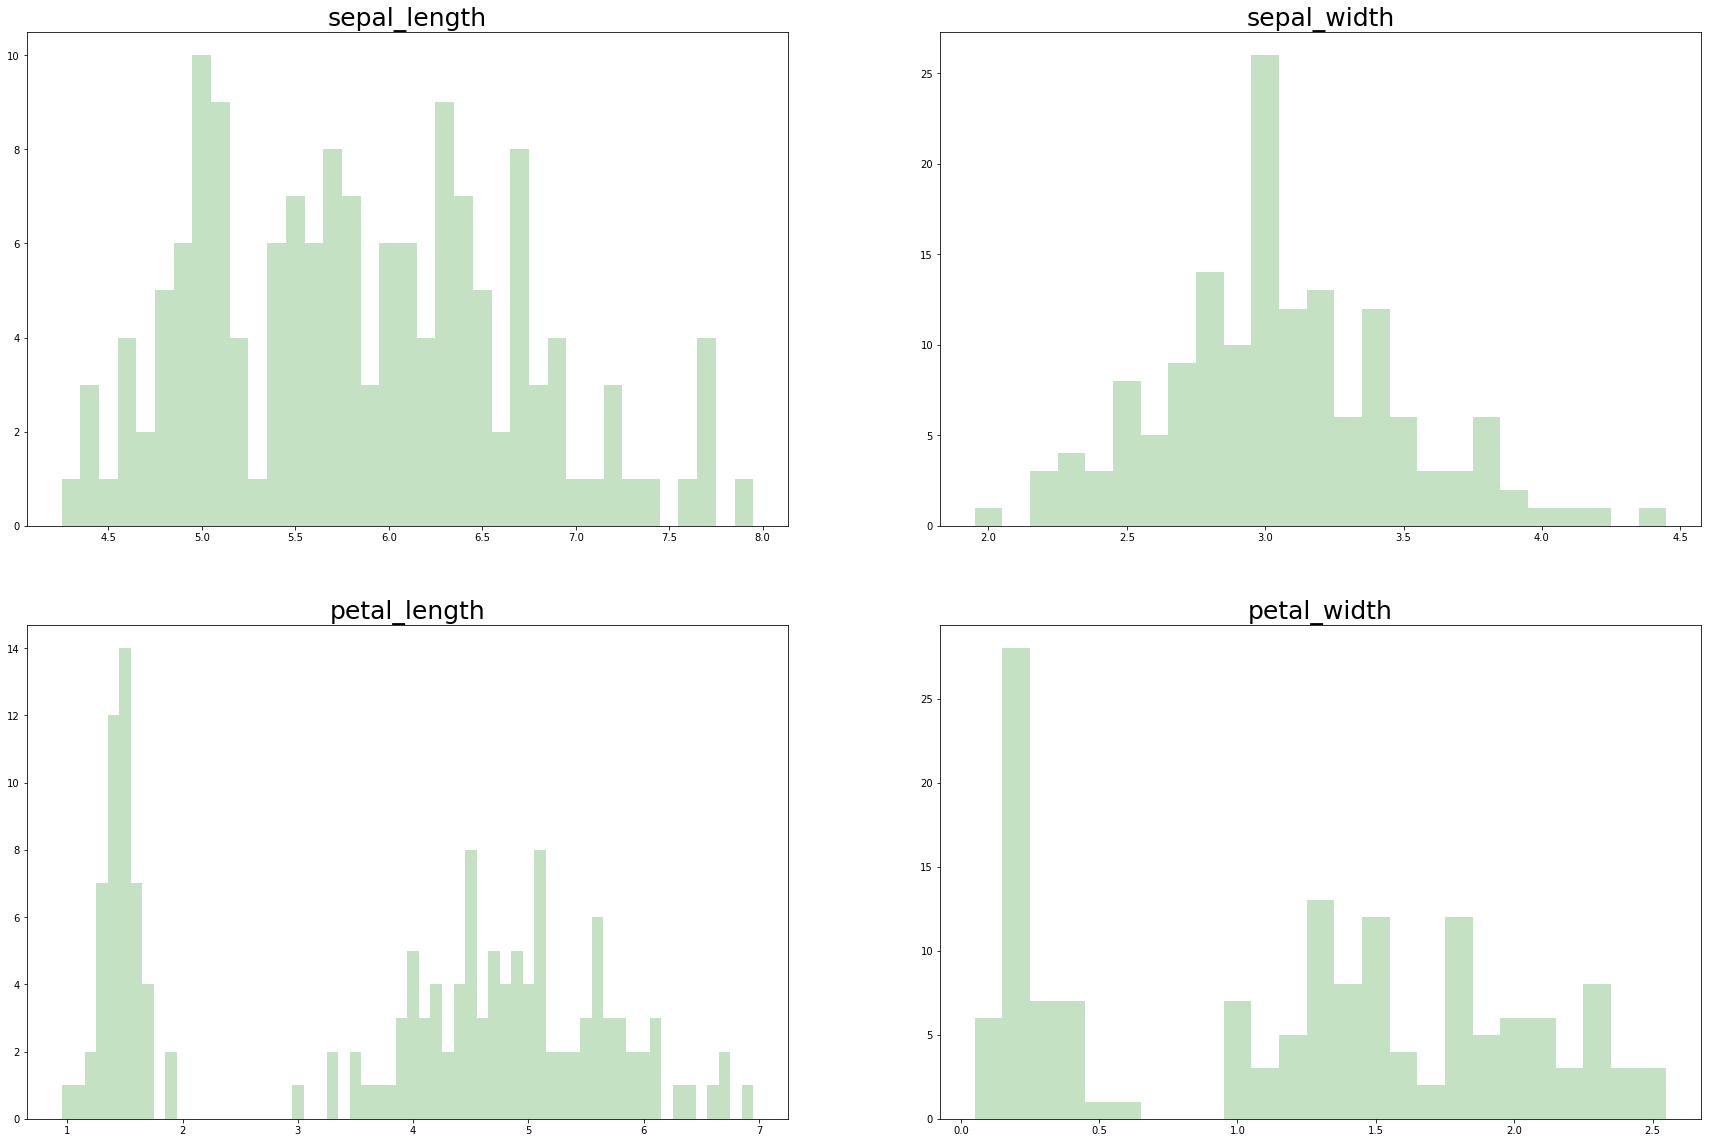

In [3]:
iris = pd.read_csv('../iris_byWPS.csv')
property = ['sepal_length','sepal_width','petal_length','petal_width','Class']
ax = plt.figure()
for i in range(0,4):
    uni = iris[property[i]].unique()
    count = iris[property[i]].value_counts()
    f = ax.add_subplot(2,2,i+1)
    plt.bar(uni,count[uni],color='g',alpha=0.23,width=0.1)
#     f.set_
    f.set_title(label=property[i],size=25)

## 使用5NN，改变数据集划分比例

In [4]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)

iris = load_iris()
i = 0.1
p = []
q = []
while(i<0.95):
    train_data, test_data, train_target, test_target = train_test_split(iris.data,iris.target,test_size=i, random_state = 1)
    train_model = clf.fit(train_data,train_target)
    predict_target = train_model.predict(test_data)
    q.append(round(metrics.accuracy_score(y_true  = test_target,y_pred=predict_target),3))
    p.append(i)
    i = i+0.01

split_rate = np.array(p)
accuracy = np.array(q)
data = np.array([split_rate,accuracy])

## 预测精确度随划分比例的变化,插值法平滑曲线

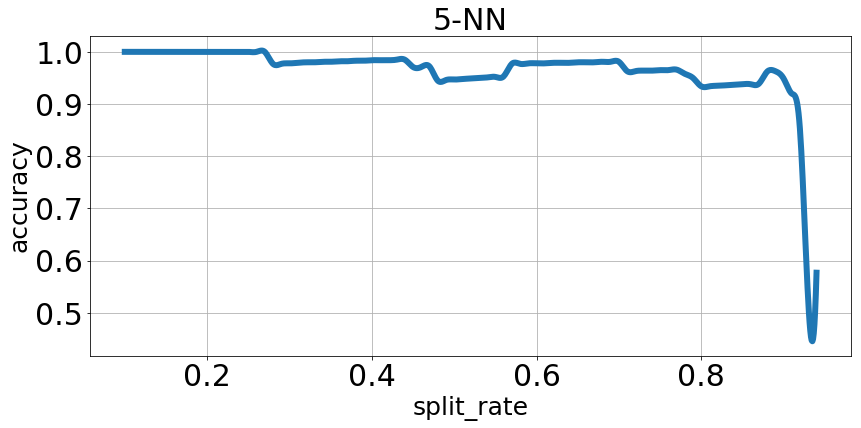

In [5]:
xnew = np.linspace(0.1,0.94,1000)
func = interpolate.interp1d(data[0], data[1], kind='cubic')
ynew = func(xnew)
fig = plt.figure()
ax = fig.add_subplot(321)

plt.plot(xnew,ynew,linewidth=6)
ax.set_title(label='5-NN',size = '30')
ax.set_xlabel('split_rate',size = '25')
ax.set_ylabel('accuracy',size = '25')
plt.grid()
for label in (ax.get_xticklabels()+ ax.get_yticklabels()):
    label.set_fontsize(30)


## 改变folds数目

In [113]:
#乱序
iris = load_iris()
sampler = np.random.permutation(150)
iris.data = iris.data.take(sampler,axis=0)
iris.target = iris.target.take(sampler)
folds = []
accs = []
for i in range(2,20):
    kf = KFold(n_splits=i)
    acc = 0
    for train_index,test_index in kf.split(iris.data):
        train_model = clf.fit(iris.data[train_index],iris.target[train_index])
        predict_target = train_model.predict(iris.data[test_index])
        acc = acc + metrics.accuracy_score(y_true=iris.target[test_index],y_pred=predict_target)
    folds.append(i)
    accs.append(acc/i)
folds = np.array(folds)
accs = np.array(accs)

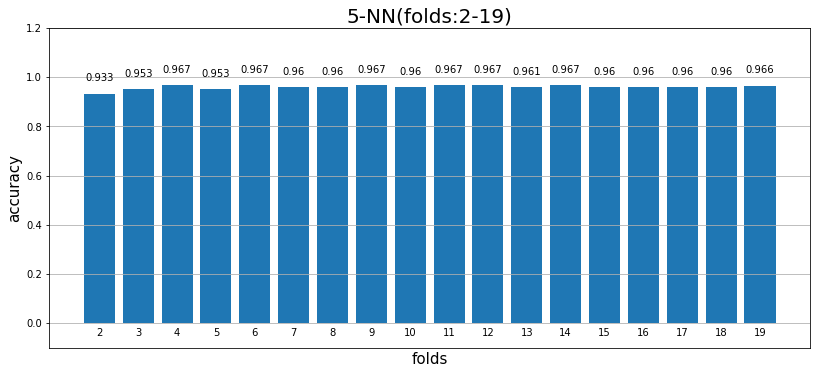

In [114]:
fig = plt.figure()
ax = fig.add_subplot(321)
plt.bar(folds,accs)
ax.set_title(label='5-NN(folds:2-19)',size = '20')
ax.set_xlabel('folds',size = '15')
ax.set_ylabel('accuracy',size = '15')
ax.set_xticks([])
ax.set_ybound(upper=1.2, lower=-0.1)
plt.grid()
for xx,yy in zip(folds,accs):
    plt.text(xx, yy+0.05,str(round(yy,3)),ha='center')    
    plt.text(xx, -0.05,str(xx),ha='center')

## 3.改变K值

In [120]:
folds = []
accs = []
for i in range(1,15):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    kf = KFold(n_splits=5)
    acc = 0
    for train_index,test_index in kf.split(iris.data):
        train_model = clf.fit(iris.data[train_index],iris.target[train_index])
        predict_target = train_model.predict(iris.data[test_index])
        acc = acc + metrics.accuracy_score(y_true=iris.target[test_index],y_pred=predict_target)
    folds.append(i)
    accs.append(acc/5)
folds = np.array(folds)
accs = np.array(accs)

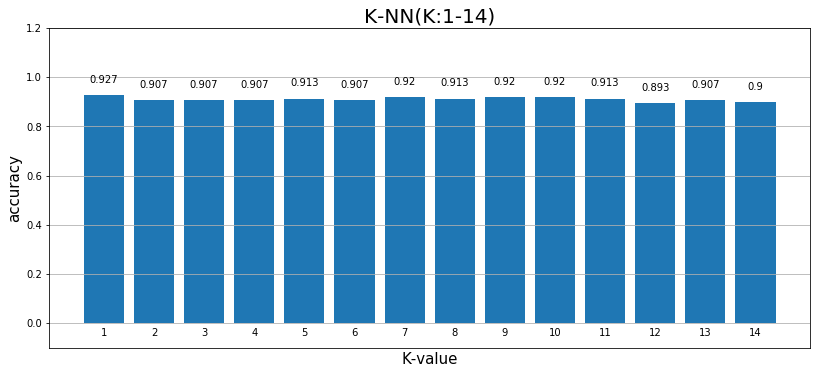

In [121]:
fig = plt.figure()
ax = fig.add_subplot(321)
plt.bar(folds,accs)
ax.set_title(label='K-NN(K:1-14)',size = '20')
ax.set_xlabel('K-value',size = '15')
ax.set_ylabel('accuracy',size = '15')
ax.set_xticks([])
ax.set_ybound(upper=1.2, lower=-0.1)
plt.grid()
for xx,yy in zip(folds,accs):
    plt.text(xx, yy+0.05,str(round(yy,3)),ha='center')    
    plt.text(xx, -0.05,str(xx),ha='center')

## 归一化

In [117]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()


In [118]:
iris = load_iris()
iris_normal = min_max_scaler.fit_transform(iris.data)

kf = KFold(n_splits=10)

folds = []
accs_2 = []
for i in range(1,15):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    acc = 0
    for train_index,test_index in kf.split(iris_normal):
        train_model = clf.fit(iris_normal[train_index],iris.target[train_index])
        predict_target = train_model.predict(iris_normal[test_index])
        acc = acc + metrics.accuracy_score(y_true=iris.target[test_index],y_pred=predict_target)
    folds.append(i)
    accs_2.append(acc/10)
folds = np.array(folds)
accs_2 = np.array(accs_2)

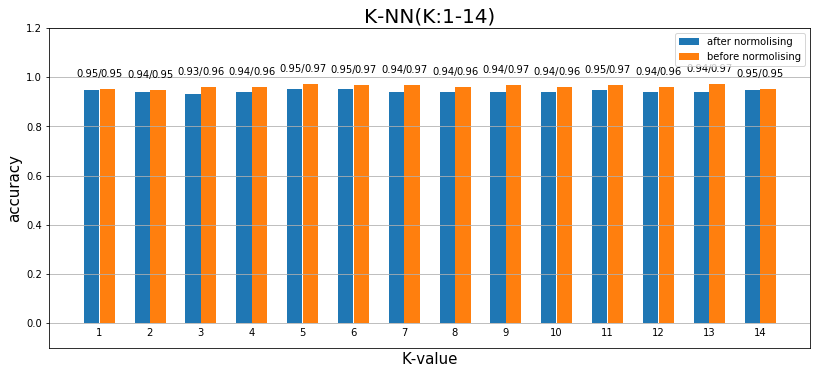

In [119]:
fig = plt.figure()
ax = fig.add_subplot(321)
width = 0.3
plt.bar(folds-width/2,accs_2, width=width,label='after normolising')
plt.bar(folds+width/2+0.01,accs,width,label='before normolising')
ax.set_title(label='K-NN(K:1-14)',size = '20')
ax.set_xlabel('K-value',size = '15')
ax.set_ylabel('accuracy',size = '15')
ax.set_xticks([])
ax.set_ybound(upper=1.2, lower=-0.1)
plt.grid()
plt.legend()
for xx,yy,yy2 in zip(folds,accs,accs_2):
    plt.text(xx-0.2, yy+0.05,str(round(yy2,2))+'/',ha='center')    
    plt.text(xx+0.25, yy+0.05,str(round(yy,2)),ha='center')    
    plt.text(xx, -0.05,str(xx),ha='center')  

In [102]:
accs.max(),accs.min()

(0.9266666666666665, 0.8933333333333333)